In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from numpy.core.defchararray import add

from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform # Xavier's initialization
from keras.optimizers import SGD                         # Stochastic Gradient Descent

In [2]:
# Load data set
data = pd.read_csv('D:/KULIAHHH/TUGAS AKHIR/TA-2/datasampel/fktp_not_transformation.csv')
data.drop(['Unnamed: 0', 'ID Kunjungan', 'Nomor Peserta', 'FKTP-tanggal datang', 'FKTP-tanggal pulang', 'Segmen Peserta yang Terdaftar', 'Kepemilikan Faskes yang Terdaftar', 
         'Jenis Faskes yang Terdaftar', 'Provinsi Peserta Terdaftar', 'Kab/Kota Peserta Terdaftar', 'FKTP-Kab/Kota Faskes Rujukan', 'FKTP-Kab/Kota Faskes', 'FKTP-Provinsi Faskes Rujukan', 'FKTP-Kab/Kota Faskes Rujukan', 'FKTP-Kepemilikan Faskes Rujukan', 'FKTP-Jenis Faskes Rujukan',
        'FKTP-Jenis Kunjungan', 'FKTP-Poli Faskes Rujukan', 'FKTP-Provinsi Faskes', 'Status Kawin', 'Hubungan Keluarga', 'FKTP-Year', 'FKTP-Month', 'FKTP-Kode dan Nama Diagnosis', 'Kapitasi?', 'FKTP-Biaya Verifikasi', 'Umur'], axis=1, inplace=True)

In [3]:
data['FKTP-Weekend?'] = data['FKTP-Weekend?'].astype('category')
data['FKTP-Quarter'] = data['FKTP-Quarter'].astype('category')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733755 entries, 0 to 1733754
Data columns (total 21 columns):
 #   Column                        Dtype   
---  ------                        -----   
 0   Jumlah Tindakan Non-Kapitasi  int64   
 1   FKTP-Kepemilikan Faskes       object  
 2   FKTP-Jenis Faskes             object  
 3   FKTP-Tipe Faskes              object  
 4   FKTP-Tingkat Layanan          object  
 5   FKTP-Poli                     object  
 6   FKTP-Segmen Peserta           object  
 7   FKTP-Status Pulang            object  
 8   FKTP-Biaya Tagih              int64   
 9   Non-Kapitasi?                 object  
 10  Dirujuk?                      object  
 11  provinsi rujukan sama?        object  
 12  kab/kota rujukan sama?        object  
 13  FKTP-Tipe Faskes Rujukan      object  
 14  FKTP-Lama Kunjungan           int64   
 15  FKTP-Hari Kunjungan           object  
 16  FKTP-Weekend?                 category
 17  FKTP-Quarter                  category
 18  Ke

In [5]:
print(data['FKTP-Biaya Tagih'].max())
print(data['FKTP-Biaya Tagih'].min())

9460000
0


In [6]:
print("The number of numerical variables in the dataset : {}".format(data.select_dtypes(include=[np.number]).shape[1]))
print("The number of categorical variables in the dataset : {}".format(data.select_dtypes(exclude=[np.number]).shape[1]))

The number of numerical variables in the dataset : 3
The number of categorical variables in the dataset : 18


In [7]:
data_num = data.select_dtypes(include=[np.number])
data_cat = data.select_dtypes(exclude=[np.number])

# Binning Numerical Feature

In [8]:
bins = np.linspace(min(data['Jumlah Tindakan Non-Kapitasi']), max(data['Jumlah Tindakan Non-Kapitasi']), 6)
kategori = ['sangat sedikit', 'sedikit', 'standar', 'banyak', 'sangat banyak']
data['jumlah_tindakan_non_kapitasi_binned'] = pd.cut(data['Jumlah Tindakan Non-Kapitasi'], bins, labels=kategori, include_lowest=True)

In [9]:
data[['jumlah_tindakan_non_kapitasi_binned', 'Jumlah Tindakan Non-Kapitasi']][1000:1110]

,jumlah_tindakan_non_kapitasi_binned,Jumlah Tindakan Non-Kapitasi
1000,sangat sedikit,1
1001,sangat sedikit,2
1002,sangat sedikit,1
1003,sangat sedikit,1
1004,sangat sedikit,1
...,...,...
1105,sangat sedikit,2
1106,sangat sedikit,2
1107,sangat sedikit,1
1108,sangat sedikit,1


In [10]:
bins = np.linspace(min(data['FKTP-Biaya Tagih']), max(data['FKTP-Biaya Tagih']), 6)
kategori = ['sangat murah', 'murah', 'standar', 'mahal', 'sangat mahal']
data['biaya_tagih_binned'] = pd.cut(data['FKTP-Biaya Tagih'], bins, labels=kategori, include_lowest=True)

In [11]:
bins = np.linspace(min(data['FKTP-Lama Kunjungan']), max(data['FKTP-Lama Kunjungan']), 6)
kategori = ['sangat sebentar', 'sebentar', 'standar', 'lama', 'sangat lama']
data['lama_kunjungan_binned'] = pd.cut(data['FKTP-Lama Kunjungan'], bins, labels=kategori, include_lowest=True)

In [12]:
data_num = data.select_dtypes(include=[np.number])
data_cat = data.select_dtypes(exclude=[np.number])

In [17]:
data[['lama_kunjungan_binned', 'Jumlah Tindakan Non-Kapitasi', 'biaya_tagih_binned']]

,lama_kunjungan_binned,Jumlah Tindakan Non-Kapitasi,biaya_tagih_binned
0,sangat sebentar,1,sangat murah
1,sangat sebentar,1,sangat murah
2,sangat sebentar,1,sangat murah
3,sangat sebentar,1,sangat murah
4,sangat sebentar,1,sangat murah
...,...,...,...
1733750,sangat sebentar,0,sangat murah
1733751,sangat sebentar,0,sangat murah
1733752,sangat sebentar,0,sangat murah
1733753,sangat sebentar,0,sangat murah


In [20]:
data[['FKTP-Lama Kunjungan', 'lama_kunjungan_binned', 'Jumlah Tindakan Non-Kapitasi', 'jumlah_tindakan_non_kapitasi_binned', 'FKTP-Biaya Tagih', 'biaya_tagih_binned']]

,FKTP-Lama Kunjungan,lama_kunjungan_binned,Jumlah Tindakan Non-Kapitasi,jumlah_tindakan_non_kapitasi_binned,FKTP-Biaya Tagih,biaya_tagih_binned
0,4,sangat sebentar,1,sangat sedikit,360000,sangat murah
1,4,sangat sebentar,1,sangat sedikit,360000,sangat murah
2,1,sangat sebentar,1,sangat sedikit,15000,sangat murah
3,2,sangat sebentar,1,sangat sedikit,150000,sangat murah
4,1,sangat sebentar,1,sangat sedikit,15000,sangat murah
...,...,...,...,...,...,...
1733750,1,sangat sebentar,0,sangat sedikit,0,sangat murah
1733751,1,sangat sebentar,0,sangat sedikit,0,sangat murah
1733752,1,sangat sebentar,0,sangat sedikit,0,sangat murah
1733753,1,sangat sebentar,0,sangat sedikit,0,sangat murah


# One Hot Encoding

In [10]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733755 entries, 0 to 1733754
Data columns (total 21 columns):
 #   Column                               Dtype   
---  ------                               -----   
 0   FKTP-Kepemilikan Faskes              object  
 1   FKTP-Jenis Faskes                    object  
 2   FKTP-Tipe Faskes                     object  
 3   FKTP-Tingkat Layanan                 object  
 4   FKTP-Poli                            object  
 5   FKTP-Segmen Peserta                  object  
 6   FKTP-Status Pulang                   object  
 7   Non-Kapitasi?                        object  
 8   Dirujuk?                             object  
 9   provinsi rujukan sama?               object  
 10  kab/kota rujukan sama?               object  
 11  FKTP-Tipe Faskes Rujukan             object  
 12  FKTP-Hari Kunjungan                  object  
 13  FKTP-Weekend?                        category
 14  FKTP-Quarter                         category
 15  Kelas Rawat Pes

In [21]:
one_hot_encoder = pd.get_dummies(data_cat, prefix_sep='_', drop_first=True)

In [22]:
one_hot_encoder

,FKTP-Kepemilikan Faskes_MISSING,FKTP-Kepemilikan Faskes_PEMERINTAH KABUPATEN/KOTA,FKTP-Kepemilikan Faskes_PEMERINTAH PROVINSI,FKTP-Kepemilikan Faskes_POLRI,FKTP-Kepemilikan Faskes_SWASTA,FKTP-Kepemilikan Faskes_TNI AD,FKTP-Kepemilikan Faskes_TNI AL,FKTP-Kepemilikan Faskes_TNI AU,FKTP-Kepemilikan Faskes_VERTIKAL/PUSAT,FKTP-Jenis Faskes_DOKTER UMUM,...,jumlah_tindakan_non_kapitasi_binned_banyak,jumlah_tindakan_non_kapitasi_binned_sangat banyak,biaya_tagih_binned_murah,biaya_tagih_binned_standar,biaya_tagih_binned_mahal,biaya_tagih_binned_sangat mahal,lama_kunjungan_binned_sebentar,lama_kunjungan_binned_standar,lama_kunjungan_binned_lama,lama_kunjungan_binned_sangat lama
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733750,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1733751,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1733752,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1733753,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## **Dimensionality Reduction with MCA**

In [40]:
import prince
mca = prince.MCA(n_components=5, n_iter=3, copy=True, check_input=True, engine='auto', random_state=42)

In [ ]:
mca = mca.fit(data_cat)

In [ ]:
mca.eigenvalues_

In [ ]:
mca.total_inertia_

In [ ]:
mca.explained_inertia_

In [ ]:
final_component_mca = mca.transform(data_cat)

In [ ]:
# from numpy.core.defchararray import add

# final_component_mca = final_component_mca.assign(new=add('', np.arange(1, len(final_component) + 1).astype(str)))

In [ ]:
final_component_mca.rename(columns = {0 : 'first_component_mca', 1 : 'second_component_mca', 2 : 'third_component_mca', 3: 'fourth_component_mca', 4: 'fifth_component_pca'}, inplace = True)

## **Dimensionality Reduction with PCA**

### Correlation

In [17]:
import seaborn as sn
import matplotlib.pyplot as plt

corrMatrix = data_num.corr()
# corrMatrix
corrMatrix.style.background_gradient(cmap='coolwarm')

,Jumlah Tindakan Non-Kapitasi,FKTP-Biaya Tagih,FKTP-Biaya Verifikasi,FKTP-Lama Kunjungan,FKTP-Weekend?,FKTP-Quarter,Umur
Jumlah Tindakan Non-Kapitasi,1.000000,0.753939,0.753939,0.076596,0.059383,0.000072,-0.010630
FKTP-Biaya Tagih,0.753939,1.000000,1.000000,0.111208,0.048271,-0.010833,-0.026754
FKTP-Biaya Verifikasi,0.753939,1.000000,1.000000,0.111208,0.048271,-0.010833,-0.026754
FKTP-Lama Kunjungan,0.076596,0.111208,0.111208,1.000000,0.008498,-0.007350,-0.001712
FKTP-Weekend?,0.059383,0.048271,0.048271,0.008498,1.000000,0.007972,-0.017904
FKTP-Quarter,0.000072,-0.010833,-0.010833,-0.007350,0.007972,1.000000,0.002127
Umur,-0.010630,-0.026754,-0.026754,-0.001712,-0.017904,0.002127,1.000000


In [18]:
# drop atribut "Biaya verifikasi"
# Load data set
data_num.drop(['FKTP-Biaya Verifikasi'], axis=1, inplace=True)

C:\Users\WIN10\Anaconda3\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [19]:
from sklearn.preprocessing import MinMaxScaler
# normalizing the data
X_std = MinMaxScaler(feature_range=(0, 1)).fit_transform(data_num)

In [20]:
from sklearn.cluster import KMeans # Our clustering algorithm
from sklearn.decomposition import PCA # Needed for dimension reduction
pca = PCA()
pca.fit(X_std)

PCA()

Text(0, 0.5, 'Cummulative Explained Variance')

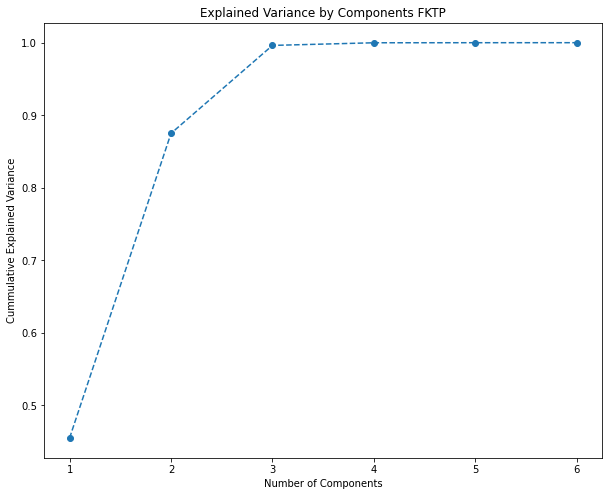

In [21]:
plt.figure(figsize = (10,8))
plt.plot(range(1,7), pca.explained_variance_ratio_.cumsum(), marker ='o', linestyle='--')
plt.title('Explained Variance by Components FKTP')
plt.xlabel('Number of Components')
plt.ylabel('Cummulative Explained Variance')


In [23]:
pca = PCA(n_components=3)
pca.fit(X_std)
final_principal = pca.transform(X_std)

In [24]:
final_principal

array([[ 0.45074492, -0.20293334,  0.27550007],
       [-0.21269971, -0.13004524, -0.17619359],
       [-0.54434139, -0.0973717 , -0.1284434 ],
       ...,
       [ 0.11903903, -0.17016593,  0.27624779],
       [ 0.11895291, -0.16592072, -0.03504339],
       [-0.21276157, -0.1298626 , -0.23259102]])

In [25]:
final_principal = pd.DataFrame(final_principal)

In [26]:
final_principal

,0,1,2
0,0.450745,-0.202933,0.275500
1,-0.212700,-0.130045,-0.176194
2,-0.544341,-0.097372,-0.128443
3,0.450670,-0.199098,-0.007469
4,0.450672,-0.199114,-0.007454
...,...,...,...
1733750,0.450699,-0.203523,0.275701
1733751,0.119042,-0.170295,0.285681
1733752,0.119039,-0.170166,0.276248
1733753,0.118953,-0.165921,-0.035043


In [27]:
from numpy.core.defchararray import add

final_principal = final_principal.assign(new=add('', np.arange(1, len(final_principal) + 1).astype(str)))

In [28]:
final_principal

,0,1,2,new
0,0.450745,-0.202933,0.275500,1
1,-0.212700,-0.130045,-0.176194,2
2,-0.544341,-0.097372,-0.128443,3
3,0.450670,-0.199098,-0.007469,4
4,0.450672,-0.199114,-0.007454,5
...,...,...,...,...
1733750,0.450699,-0.203523,0.275701,1733751
1733751,0.119042,-0.170295,0.285681,1733752
1733752,0.119039,-0.170166,0.276248,1733753
1733753,0.118953,-0.165921,-0.035043,1733754


In [29]:
final_principal.rename(columns = {0 : 'first_component_pca', 1 : 'second_component_pca', 2 : 'third_component_pca'}, inplace = True)

In [30]:
final_attribut = pd.concat([final_principal, final_component], axis=1)

In [31]:
final_attribut

,first_component_pca,second_component_pca,third_component_pca,new,first_component_mca,second_component_mca,third_component_mca,fourth_component_mca,new
0,0.450745,-0.202933,0.275500,1,-0.524740,1.356392,-2.244448,0.187733,1
1,-0.212700,-0.130045,-0.176194,2,-0.653918,1.492598,-1.778315,0.107817,2
2,-0.544341,-0.097372,-0.128443,3,-0.570177,1.041680,-0.426621,-0.012451,3
3,0.450670,-0.199098,-0.007469,4,-0.575592,1.335308,-2.370340,0.178331,4
4,0.450672,-0.199114,-0.007454,5,-0.431267,0.641252,-0.624287,0.014877,5
...,...,...,...,...,...,...,...,...,...
1733750,0.450699,-0.203523,0.275701,1733751,1.230549,0.852583,0.220611,0.032814,1733751
1733751,0.119042,-0.170295,0.285681,1733752,1.230549,0.852583,0.220611,0.032814,1733752
1733752,0.119039,-0.170166,0.276248,1733753,1.236709,0.860127,0.229102,0.060591,1733753
1733753,0.118953,-0.165921,-0.035043,1733754,1.474656,-0.073374,-0.184997,-0.022447,1733754


In [32]:
final_attribut.drop(['new'], axis=1, inplace=True)

# Autoencoder

In [13]:
# Let's scale the data first
scaler = StandardScaler()
normalized_df = scaler.fit_transform(one_hot_encoder)

# AUTOENCODERS (PERFORM DIMENSIONALITY REDUCTION USING AUTOENCODERS)
input_df = Input(shape=(123,))  # The 31 features of our dataset

# Encoder
x = Dense(units=7, activation='relu')(input_df)
x = Dense(units=500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(units=500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(units=2000, activation='relu', kernel_initializer='glorot_uniform')(x)
# Bottleneck
encoded = Dense(units=10, activation='relu', kernel_initializer='glorot_uniform')(x)
# Decoder
x = Dense(units=2000, activation='relu', kernel_initializer='glorot_uniform')(encoded)
x = Dense(units=500, activation='relu', kernel_initializer='glorot_uniform')(x)
# we reconstruct the same number of features as the input
decoded = Dense(units=123, kernel_initializer='glorot_uniform')(x)   

# Autoencoder
autoencoder = Model(input_df, decoded)
# Encoder
encoder = Model(input_df, encoded)

# autoencoder.compile(optimizer='adam', loss='mean_squared_error')
# autoencoder.fit(x= normalized_df, y= normalized_df, batch_size=128, epochs=25,verbose=1)
# Use Autoencoder to reduce the number of features / dimensions
pred = encoder.predict(normalized_df)


### ** K-Means**

Menentukan jumlah cluster dengan elbow method

In [95]:
from sklearn.cluster import KMeans # Our clustering algorithm
wcv = []
for i in range(1,21):
  kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans_pca.fit(final_attribut)
  wcv.append(kmeans_pca.inertia_)

plotting nilai wcv dalam graph

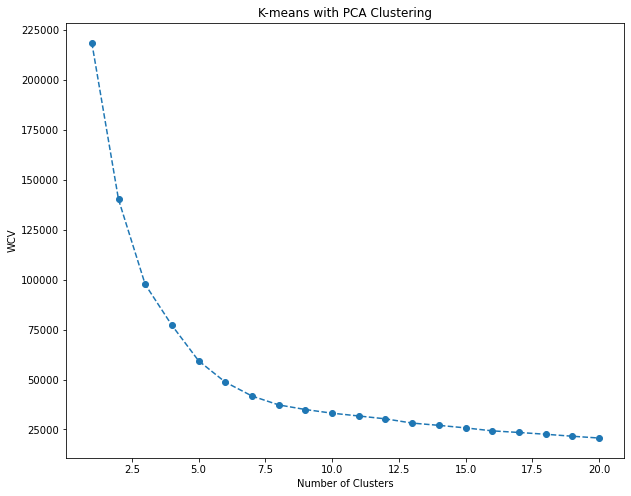

In [96]:
from matplotlib import*
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
plt.plot(range(1, 21), wcv, marker = 'o', linestyle ="--")
plt.xlabel('Number of Clusters')
plt.ylabel('WCV')
plt.title('K-means with PCA Clustering')
plt.show()

0.5855002557770888
0.7116820002792217
0.5281061583565637
0.43458942265232964
0.35493225462434125
0.505292529667864
0.5490267173449443


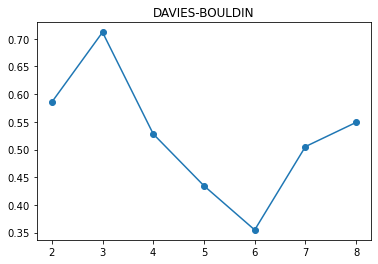

In [19]:
from sklearn.metrics import davies_bouldin_score
k = [2, 3, 4, 5, 6, 7, 8]
scores = []

for i in k:
    y_pred = KMeans(n_clusters = i, max_iter=1000, random_state = 43).fit_predict(pred)
    score = davies_bouldin_score(pred, y_pred)
    scores.append(score)
    print(score)

plt.plot(k, scores, 'o-')
plt.title('DAVIES-BOULDIN')
plt.show()

726490.6526666672
858245.395495061
1000408.2901043548
1419396.0972717325
2696104.73985119
2635492.00399133
2700306.2074287655


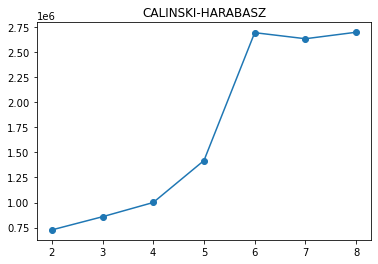

In [20]:
from sklearn.metrics import calinski_harabasz_score
k = [2, 3, 4, 5, 6, 7, 8]
scores = []
 
for i in k:
    y_pred = KMeans(n_clusters = i, max_iter=1000, random_state = 43).fit_predict(final_component_mca)
    score = calinski_harabasz_score(final_component_mca, y_pred)
    scores.append(score)
    print(score)
 
plt.plot(k, scores, 'o-')
plt.title('CALINSKI-HARABASZ')
plt.show()

##### n=2

#### n = 3

#### n=4

#### n=5

In [14]:
# Kmeans
kmeans_pca_5= KMeans(5)
kmeans_pca_5.fit(pred)
centroids = kmeans_pca_5.cluster_centers_
clusters = kmeans_pca_5.labels_


In [34]:
fktp_not_transform = pd.read_csv('D:/KULIAHHH/TUGAS AKHIR/TA-2/datasampel/fktp_not_transformation.csv')

bins = np.linspace(min(fktp_not_transform['Jumlah Tindakan Non-Kapitasi']), max(fktp_not_transform['Jumlah Tindakan Non-Kapitasi']), 6)
kategori = ['sangat sedikit', 'sedikit', 'standar', 'banyak', 'sangat banyak']
fktp_not_transform['jumlah_tindakan_non_kapitasi_binned'] = pd.cut(fktp_not_transform['Jumlah Tindakan Non-Kapitasi'], bins, labels=kategori, include_lowest=True)

# data[['jumlah_tindakan_non_kapitasi_binned', 'Jumlah Tindakan Non-Kapitasi']][1000:1110]

bins = np.linspace(min(fktp_not_transform['FKTP-Biaya Tagih']), max(fktp_not_transform['FKTP-Biaya Tagih']), 6)
kategori = ['sangat murah', 'murah', 'standar', 'mahal', 'sangat mahal']
fktp_not_transform['biaya_tagih_binned'] = pd.cut(fktp_not_transform['FKTP-Biaya Tagih'], bins, labels=kategori, include_lowest=True)

bins = np.linspace(min(fktp_not_transform['FKTP-Lama Kunjungan']), max(fktp_not_transform['FKTP-Lama Kunjungan']), 6)
kategori = ['sangat sebentar', 'sebentar', 'standar', 'lama', 'sangat lama']
fktp_not_transform['lama_kunjungan_binned'] = pd.cut(fktp_not_transform['FKTP-Lama Kunjungan'], bins, labels=kategori, include_lowest=True)

In [35]:
df_with_labels = pd.concat([fktp_not_transform, pd.DataFrame({'cluster':clusters})], axis=1 )
df_with_labels['Segment K-means Autoencoder'] = kmeans_pca_5.labels_
df_with_labels.to_csv('fktp_hasil_cluster_binning_autoencoder_5.csv')


In [ ]:
from sklearn.metrics import silhouette_score

print(silhouette_score(pred, kmeans_pca_5.labels_))

In [25]:
kmeans_pca_5.inertia_

4457.5908203125

n=6

In [ ]:
# Kmeans
kmeans_pca_6= KMeans(6)
kmeans_pca_6.fit(pred)
centroids = kmeans_pca_6.cluster_centers_
clusters = kmeans_pca_6.labels_


In [37]:
fktp_not_transform = pd.read_csv('D:/KULIAHHH/TUGAS AKHIR/TA-2/datasampel/fktp_not_transformation.csv')

bins = np.linspace(min(fktp_not_transform['Jumlah Tindakan Non-Kapitasi']), max(fktp_not_transform['Jumlah Tindakan Non-Kapitasi']), 6)
kategori = ['sangat sedikit', 'sedikit', 'standar', 'banyak', 'sangat banyak']
fktp_not_transform['jumlah_tindakan_non_kapitasi_binned'] = pd.cut(fktp_not_transform['Jumlah Tindakan Non-Kapitasi'], bins, labels=kategori, include_lowest=True)

# data[['jumlah_tindakan_non_kapitasi_binned', 'Jumlah Tindakan Non-Kapitasi']][1000:1110]

bins = np.linspace(min(fktp_not_transform['FKTP-Biaya Tagih']), max(fktp_not_transform['FKTP-Biaya Tagih']), 6)
kategori = ['sangat murah', 'murah', 'standar', 'mahal', 'sangat mahal']
fktp_not_transform['biaya_tagih_binned'] = pd.cut(fktp_not_transform['FKTP-Biaya Tagih'], bins, labels=kategori, include_lowest=True)

bins = np.linspace(min(fktp_not_transform['FKTP-Lama Kunjungan']), max(fktp_not_transform['FKTP-Lama Kunjungan']), 6)
kategori = ['sangat sebentar', 'sebentar', 'standar', 'lama', 'sangat lama']
fktp_not_transform['lama_kunjungan_binned'] = pd.cut(fktp_not_transform['FKTP-Lama Kunjungan'], bins, labels=kategori, include_lowest=True)

In [38]:
df_with_labels = pd.concat([fktp_not_transform, pd.DataFrame({'cluster':clusters})], axis=1 )
df_with_labels['Segment K-means Autoencoder'] = kmeans_pca_6.labels_
df_with_labels.to_csv('fktp_hasil_cluster_binning_autoencoder_6.csv')


In [ ]:
from sklearn.metrics import silhouette_score

print(silhouette_score(pred, kmeans_pca_6.labels_))

In [30]:
kmeans_pca_6.inertia_

3977.8056640625

In [ ]:
# from sklearn.metrics import silhouette_score
# k = [2, 3, 4, 5, 6, 7, 8]
# score=[]
# for n_cluster in k:
#     kmeans = KMeans(n_clusters=n_cluster).fit(final_principal)
#     score.append(silhouette_score(final_principal,kmeans.labels_))

# plt.plot(k, score, 'o-')
# plt.xlabel("Value for k")
# plt.ylabel("Silhouette score")
# plt.title('Silhouette Method')
# plt.show()

# VISUALISASI CLUSTER

In [ ]:
# Getting the Centroids
centroids = kmeans_pca_6.cluster_centers_
X = np.array(pred)
label = kmeans_pca_6.labels_
u_labels = np.unique(label)

#plotting the results:
 
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 100, color = 'k')
plt.legend()
plt.show()

In [ ]:
label = kmeans_pca_6.labels_
X = np.array(pred)
fig = plt.figure(figsize = (10,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[label == 0,0],X[label == 0,1],X[label == 0,2])
ax.scatter(X[label == 1,0],X[label == 1,1],X[label == 1,2])
ax.scatter(X[label == 2,0],X[label == 2,1],X[label == 2,2])
ax.scatter(X[label == 3,0],X[label == 3,1],X[label == 3,2])
ax.scatter(X[label == 4,0],X[label == 4,1],X[label == 4,2])
ax.scatter(X[label == 5,0],X[label == 5,1],X[label == 5,2])
# ax.scatter(final_principal[label == 5,0],final_principal[label == 5,1],final_principal[label == 5,2])


Analisis Hasil

In [24]:
data = pd.read_csv('D:/KULIAHHH/TUGAS AKHIR/TA-2/datasampel/fktp_not_transformation.csv')

In [25]:
fkrtl_segm_pca_kmeans = pd.concat([data.reset_index(drop = True), pd.DataFrame(final_component_mca)], axis = 1)
fkrtl_segm_pca_kmeans.columns.values[-5: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5']

fkrtl_segm_pca_kmeans['Cluster'] = kmeans_pca_5.labels_

In [26]:
fkrtl_segm_pca_kmeans

,Unnamed: 0,Jumlah Tindakan Non-Kapitasi,FKTP-tanggal datang,FKTP-tanggal pulang,FKTP-Provinsi Faskes,FKTP-Kab/Kota Faskes,FKTP-Kepemilikan Faskes,FKTP-Jenis Faskes,FKTP-Tipe Faskes,FKTP-Tingkat Layanan,...,Provinsi Peserta Terdaftar,Kab/Kota Peserta Terdaftar,Umur,kategori umur,Component 1,Component 2,Component 3,Component 4,Component 5,Cluster
0,0,1,2015-12-18,2015-12-21,JAWA TIMUR,KAB. BANGKALAN,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,RAWAT INAP,RAWAT INAP TINGKAT PERTAMA,...,JAWA TIMUR,KAB. BANGKALAN,65,lanjut usia,-0.428824,1.190384,1.650565,-0.202905,-0.146894,3
1,1,1,2016-05-31,2016-06-03,JAWA TENGAH,KAB. PEKALONGAN,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,RAWAT INAP,RAWAT INAP TINGKAT PERTAMA,...,JAWA TENGAH,KAB. PEKALONGAN,17,remaja,-0.564848,1.281304,1.348721,-0.151801,-0.260417,3
2,2,1,2016-03-23,2016-03-23,JAWA BARAT,KAB. SUMEDANG,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,RAWAT INAP,RAWAT JALAN TINGKAT PERTAMA,...,JAWA BARAT,KAB. SUMEDANG,22,dewasa,-0.474931,0.888895,0.313497,-0.103801,-0.072294,0
3,3,1,2016-12-20,2016-12-21,BENGKULU,KAB. BENGKULU TENGAH,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,RAWAT INAP,RAWAT INAP TINGKAT PERTAMA,...,BENGKULU,KAB. BENGKULU TENGAH,35,dewasa,-0.488709,1.136503,1.828591,-0.247728,-0.357598,3
4,4,1,2016-11-15,2016-11-15,BENGKULU,KAB. BENGKULU TENGAH,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,RAWAT INAP,RAWAT JALAN TINGKAT PERTAMA,...,BENGKULU,KAB. BENGKULU TENGAH,35,dewasa,-0.358328,0.538656,0.491986,-0.112197,-0.105966,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733750,1733750,0,2015-12-18,2015-12-18,LAMPUNG,KAB. PESAWARAN,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,RAWAT INAP,RAWAT JALAN TINGKAT PERTAMA,...,LAMPUNG,KAB. PESAWARAN,65,lanjut usia,1.065374,0.732324,-0.236320,-0.008670,0.067854,2
1733751,1733751,0,2016-07-29,2016-07-29,LAMPUNG,KAB. PESAWARAN,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,RAWAT INAP,RAWAT JALAN TINGKAT PERTAMA,...,LAMPUNG,KAB. PESAWARAN,66,lanjut usia,1.064817,0.736192,-0.242602,-0.014510,0.053987,2
1733752,1733752,0,2015-09-29,2015-09-29,LAMPUNG,KAB. PESAWARAN,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,RAWAT INAP,RAWAT JALAN TINGKAT PERTAMA,...,LAMPUNG,KAB. PESAWARAN,65,lanjut usia,1.069657,0.744317,-0.248217,-0.007494,0.047611,2
1733753,1733753,0,2016-08-02,2016-08-02,NANGGROE ACEH DARUSSALAM,KAB. ACEH UTARA,SWASTA,KLINIK PRATAMA,KLINIK NON RAWAT INAP,RAWAT JALAN TINGKAT PERTAMA,...,NANGGROE ACEH DARUSSALAM,KAB. ACEH UTARA,32,dewasa,1.247317,-0.070481,0.186946,-0.018069,-0.158080,2


In [27]:
fkrtl_segm_pca_kmeans['Segment'] = fkrtl_segm_pca_kmeans['Cluster'].map({0:'first', 1:'second', 2:'third', 3: 'fourth', 4:'fifth'})

In [28]:
bins = np.linspace(min(fkrtl_segm_pca_kmeans['Jumlah Tindakan Non-Kapitasi']), max(fkrtl_segm_pca_kmeans['Jumlah Tindakan Non-Kapitasi']), 6)
kategori = ['sangat sedikit', 'sedikit', 'standar', 'banyak', 'sangat banyak']
fkrtl_segm_pca_kmeans['jumlah_tindakan_non_kapitasi_binned'] = pd.cut(fkrtl_segm_pca_kmeans['Jumlah Tindakan Non-Kapitasi'], bins, labels=kategori, include_lowest=True)

# data[['jumlah_tindakan_non_kapitasi_binned', 'Jumlah Tindakan Non-Kapitasi']][1000:1110]

bins = np.linspace(min(fkrtl_segm_pca_kmeans['FKTP-Biaya Tagih']), max(fkrtl_segm_pca_kmeans['FKTP-Biaya Tagih']), 6)
kategori = ['sangat murah', 'murah', 'standar', 'mahal', 'sangat mahal']
fkrtl_segm_pca_kmeans['biaya_tagih_binned'] = pd.cut(fkrtl_segm_pca_kmeans['FKTP-Biaya Tagih'], bins, labels=kategori, include_lowest=True)

bins = np.linspace(min(fkrtl_segm_pca_kmeans['FKTP-Lama Kunjungan']), max(fkrtl_segm_pca_kmeans['FKTP-Lama Kunjungan']), 6)
kategori = ['sangat sebentar', 'sebentar', 'standar', 'lama', 'sangat lama']
fkrtl_segm_pca_kmeans['lama_kunjungan_binned'] = pd.cut(fkrtl_segm_pca_kmeans['FKTP-Lama Kunjungan'], bins, labels=kategori, include_lowest=True)

In [29]:
fkrtl_segm_pca_kmeans.to_csv('D:/KULIAHHH/TUGAS AKHIR/TA-2/hasil cluster/fktp-mca-kmeans-full.csv')

In [1]:
fkrtl_segm_pca_kmeans = pd.read_csv('D:/KULIAHHH/TUGAS AKHIR/TA-2/hasil cluster/fktp-pca-mca-kmeans-full.csv')

NameError: name 'pd' is not defined

In [32]:
fkrtl_segm_pca_kmeans.head()

,Unnamed: 0,Unnamed: 0.1,Jumlah Tindakan Non-Kapitasi,FKTP-tanggal datang,FKTP-tanggal pulang,FKTP-Provinsi Faskes,FKTP-Kab/Kota Faskes,FKTP-Kepemilikan Faskes,FKTP-Jenis Faskes,FKTP-Tipe Faskes,...,kategori umur,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Cluster,Segment
0,0,0,1,2015-12-18,2015-12-21,JAWA TIMUR,KAB. BANGKALAN,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,RAWAT INAP,...,lanjut usia,0.450741,-0.202892,0.275460,-0.507884,1.312016,-2.183752,0.273893,2,third
1,1,1,1,2016-05-31,2016-06-03,JAWA TENGAH,KAB. PEKALONGAN,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,RAWAT INAP,...,remaja,-0.212704,-0.130005,-0.176233,-0.634350,1.445214,-1.713579,0.168876,2,third
2,2,2,1,2016-03-23,2016-03-23,JAWA BARAT,KAB. SUMEDANG,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,RAWAT INAP,...,dewasa,-0.544341,-0.097372,-0.128444,-0.554745,1.008009,-0.423455,-0.015078,3,fourth
3,3,3,1,2016-12-20,2016-12-21,BENGKULU,KAB. BENGKULU TENGAH,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,RAWAT INAP,...,dewasa,0.450668,-0.199081,-0.007485,-0.555449,1.295537,-2.263789,0.305967,2,third
4,4,4,1,2016-11-15,2016-11-15,BENGKULU,KAB. BENGKULU TENGAH,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,RAWAT INAP,...,dewasa,0.450672,-0.199112,-0.007455,-0.420934,0.621551,-0.614644,0.017013,3,fourth


Visualisasi Cluster

C:\Users\WIN10\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


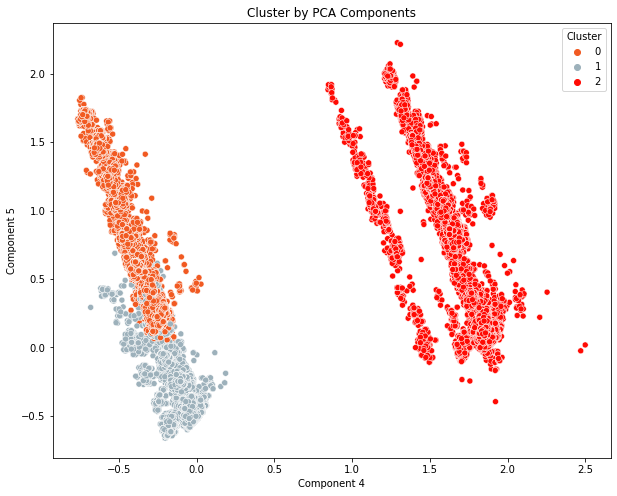

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
x_axis = fkrtl_segm_pca_kmeans['Component 4']
y_axis = fkrtl_segm_pca_kmeans['Component 5']

plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = fkrtl_segm_pca_kmeans['Cluster'], palette = ['#f15a22', '#9db1bb', "#FF0B04"])
plt.title('Cluster by PCA Components')
plt.show()

# "#4374B3", "#FFFF00"

## Analisis Hasil Custer

In [48]:
# Hasil join dengan indikator left_only
options = ['first'] 

# selecting rows based on condition 
cluster1 = fkrtl_segm_pca_kmeans[fkrtl_segm_pca_kmeans['Segment'].isin(options)]
# cluster1.head()

In [85]:
cluster1

,Jumlah Tindakan Non-Kapitasi,FKTP-Kepemilikan Faskes,FKTP-Jenis Faskes,FKTP-Tipe Faskes,FKTP-Tingkat Layanan,FKTP-Poli,FKTP-Segmen Peserta,FKTP-Status Pulang,FKTP-Biaya Tagih,FKTP-Biaya Verifikasi,...,Umur,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Cluster,Segment
0,1,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,RAWAT INAP,RAWAT INAP TINGKAT PERTAMA,UGD,BUKAN PEKERJA,SEMBUH,360000,360000,...,65,0.272082,-0.420148,0.282472,1.063875,0.984056,0.332270,0.255972,0,first
1,1,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,RAWAT INAP,RAWAT INAP TINGKAT PERTAMA,UMUM,PBI APBN,SEMBUH,360000,360000,...,17,-0.256127,-0.011869,-0.173285,1.233620,0.600207,0.176881,0.042876,0,first
3,1,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,RAWAT INAP,RAWAT INAP TINGKAT PERTAMA,UGD,PPU,SEMBUH,150000,150000,...,35,0.272927,-0.418138,-0.003067,1.102570,1.110829,0.354902,-0.006711,0,first
5,2,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,NON RAWAT INAP,RAWAT INAP TINGKAT PERTAMA,K I A,PPU,SEMBUH,600000,600000,...,27,0.274251,-0.416102,-0.080058,1.038389,0.929562,0.305616,-0.001394,0,first
6,2,SWASTA,KLINIK PRATAMA,KLINIK NON RAWAT INAP,RAWAT INAP TINGKAT PERTAMA,K I A,PPU,SEMBUH,600000,600000,...,29,0.881403,0.378096,-0.053072,0.471700,1.597725,0.441513,-0.204217,0,first
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497948,0,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,RAWAT INAP,RAWAT INAP TINGKAT PERTAMA,KANDUNGAN,PBPU,SEMBUH,0,0,...,33,-0.522491,0.188009,-0.019496,1.096333,0.821201,0.369354,0.036316,0,first
498164,0,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,RAWAT INAP,RAWAT INAP TINGKAT PERTAMA,UMUM,PBPU,SEMBUH,0,0,...,30,0.084812,0.982562,-0.040126,0.734608,0.551247,0.157808,0.010367,0,first
498595,0,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,NON RAWAT INAP,RAWAT INAP TINGKAT PERTAMA,K I A,PBPU,SEMBUH,0,0,...,32,0.084752,0.982420,-0.021080,1.071838,0.510055,0.197143,0.076405,0,first
499692,0,SWASTA,DOKTER UMUM,DOKTER PRAKTEK PERORANGAN,RAWAT INAP TINGKAT PERTAMA,K I A,PBI APBN,SEMBUH,0,0,...,39,-0.522671,0.187597,0.037641,0.616013,0.720854,0.080069,0.406616,0,first


In [51]:
# Hasil join dengan indikator left_only
options = ['second'] 

# selecting rows based on condition 
cluster2 = fkrtl_segm_pca_kmeans[fkrtl_segm_pca_kmeans['Segment'].isin(options)]
# cluster2.head()

In [37]:
cluster2

,Unnamed: 0,Unnamed: 0.1,Jumlah Tindakan Non-Kapitasi,FKTP-tanggal datang,FKTP-tanggal pulang,FKTP-Provinsi Faskes,FKTP-Kab/Kota Faskes,FKTP-Kepemilikan Faskes,FKTP-Jenis Faskes,FKTP-Tipe Faskes,...,kategori umur,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Cluster,Segment
15,15,15,1,2015-08-18,2015-08-18,JAWA TENGAH,KAB. BATANG,SWASTA,KLINIK PRATAMA,KLINIK NON RAWAT INAP,...,dewasa,0.119025,-0.166400,0.040257,-0.173417,0.028957,-0.610528,-0.042608,1,second
16,16,16,1,2015-02-02,2015-02-02,JAWA TENGAH,KAB. BATANG,SWASTA,KLINIK PRATAMA,KLINIK NON RAWAT INAP,...,dewasa,-0.544297,-0.099559,0.031918,-0.171101,0.027970,-0.612529,-0.042664,1,second
17,17,17,1,2015-04-27,2015-04-27,JAWA TENGAH,KAB. BATANG,SWASTA,KLINIK PRATAMA,KLINIK NON RAWAT INAP,...,dewasa,-0.212637,-0.132915,0.031371,-0.171101,0.027970,-0.612529,-0.042664,1,second
18,18,18,1,2016-08-27,2016-08-27,JAWA TIMUR,KAB. MADIUN,SWASTA,DOKTER UMUM,DOKTER PRAKTEK PERORANGAN,...,lanjut usia,0.219165,0.825514,0.270768,-0.121707,-0.171648,-0.531213,-0.118288,1,second
19,19,19,1,2016-11-26,2016-11-26,JAWA TIMUR,KAB. MADIUN,SWASTA,DOKTER UMUM,DOKTER PRAKTEK PERORANGAN,...,lanjut usia,0.550828,0.792029,0.279654,-0.121707,-0.171648,-0.531213,-0.118288,1,second
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1572301,1572301,1572301,0,2016-07-11,2016-07-11,JAWA TENGAH,KAB. BATANG,SWASTA,DOKTER UMUM,DOKTER PRAKTEK PERORANGAN,...,dewasa,0.119003,-0.168366,0.144186,-0.060668,-0.480485,-0.015269,-0.128283,1,second
1572302,1572302,1572302,0,2015-07-10,2015-07-10,JAWA TENGAH,KAB. BATANG,SWASTA,DOKTER UMUM,DOKTER PRAKTEK PERORANGAN,...,dewasa,0.119000,-0.168237,0.134753,-0.068545,-0.488985,-0.021698,-0.140797,1,second
1572303,1572303,1572303,0,2016-07-29,2016-07-29,BANTEN,KOTA TANGERANG,SWASTA,KLINIK PRATAMA,KLINIK NON RAWAT INAP,...,dewasa,0.118940,-0.165278,-0.082208,-0.045227,-0.503689,-0.138271,-0.102122,1,second
1572306,1572306,1572306,0,2016-10-19,2016-10-19,JAWA TIMUR,KAB. MADIUN,SWASTA,DOKTER UMUM,DOKTER PRAKTEK PERORANGAN,...,dewasa,0.450595,-0.198377,-0.101621,-0.075585,-0.431878,-0.044241,-0.134393,1,second


In [52]:
# Hasil join dengan indikator left_only
options = ['third'] 

# selecting rows based on condition 
cluster3 = fkrtl_segm_pca_kmeans[fkrtl_segm_pca_kmeans['Segment'].isin(options)]
# cluster3

In [38]:
# Hasil join dengan indikator left_only
options = ['fourth'] 

# selecting rows based on condition 
cluster4 = fkrtl_segm_pca_kmeans[fkrtl_segm_pca_kmeans['Segment'].isin(options)]
# cluster4.head()

In [39]:
# Hasil join dengan indikator left_only
options = ['fifth'] 

# selecting rows based on condition 
cluster5 = fkrtl_segm_pca_kmeans[fkrtl_segm_pca_kmeans['Segment'].isin(options)]
# cluster5.head()

In [ ]:
cluster4

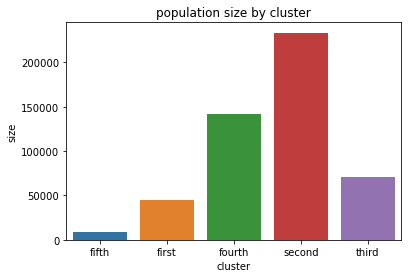

In [90]:
# Check size of each cluster - Are they all representative ?
cluster_size = []
for centroid, cluster_df in fkrtl_segm_pca_kmeans.groupby("Segment"):
        cluster_size.append([centroid, len(cluster_df)])
cluster_sizes = pd.DataFrame(cluster_size, columns = ["cluster", "size"])
cluster_sizes.set_index("cluster", drop = True, inplace = True)
sns.barplot(x=cluster_sizes.index, y='size', data=cluster_sizes)
plt.title('population size by cluster')
plt.show()

In [40]:
print('Number of samples in:')
for cluster, df_cluster in fkrtl_segm_pca_kmeans.groupby('Segment'):
  print('cluster', cluster, '->',len(df_cluster))

Number of samples in:
cluster fifth -> 340310
cluster first -> 352465
cluster fouth -> 347201
cluster second -> 343132
cluster third -> 350647


In [33]:
fkrtl_segm_pca_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733755 entries, 0 to 1733754
Data columns (total 57 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   Unnamed: 0                         int64  
 1   Unnamed: 0.1                       int64  
 2   Jumlah Tindakan Non-Kapitasi       int64  
 3   FKTP-tanggal datang                object 
 4   FKTP-tanggal pulang                object 
 5   FKTP-Provinsi Faskes               object 
 6   FKTP-Kab/Kota Faskes               object 
 7   FKTP-Kepemilikan Faskes            object 
 8   FKTP-Jenis Faskes                  object 
 9   FKTP-Tipe Faskes                   object 
 10  FKTP-Tingkat Layanan               object 
 11  FKTP-Poli                          object 
 12  FKTP-Segmen Peserta                object 
 13  FKTP-Status Pulang                 object 
 14  FKTP-Kode dan Nama Diagnosis       object 
 15  FKTP-Biaya Tagih                   int64  
 16  FKTP-Biaya Verifik

In [63]:
(cluster3['FKTP-Tipe Faskes Rujukan'].value_counts()/fkrtl_segm_pca_kmeans['FKTP-Tipe Faskes Rujukan'].value_counts())*100

APOTIK KRONIS                     100.0
APOTIK PRB DAN KRONIS             100.0
DOKTER GIGI                       100.0
DOKTER PRAKTER PERORANGAN         100.0
KHUSUS BEDAH                      100.0
KHUSUS GIGI DAN MULUT             100.0
KHUSUS HEMODIALISA                100.0
KHUSUS IBU DAN ANAK               100.0
KHUSUS JANTUNG                    100.0
KHUSUS JIWA                       100.0
KHUSUS KANKER (ONKOLOGI)          100.0
KHUSUS KUSTA                      100.0
KHUSUS LAIN                       100.0
KHUSUS MATA                       100.0
KHUSUS PARU                       100.0
KHUSUS STROKE                     100.0
KHUSUS TULANG                     100.0
KLINIK NON RAWAT INAP             100.0
LABORATORIUM                      100.0
MISSING                           100.0
NON RAWAT INAP                    100.0
OPTIK                             100.0
PMI                               100.0
RAWAT INAP                        100.0
RS COB                            100.0


In [73]:
cluster5['Non-Kapitasi?'].value_counts()

No    32428
Name: Non-Kapitasi?, dtype: int64

In [57]:
fkrtl_segm_pca_kmeans['Non-Kapitasi?'].value_counts()

No     1665895
Yes      67860
Name: Non-Kapitasi?, dtype: int64

In [138]:
print(len(cluster5)/len(cluster5['Nomor Peserta'].value_counts()))

2.4572251269227854


In [ ]:
fkrtl_segm_pca_kmeans['FKTP-Segmen Peserta'].value_counts()

In [ ]:
cluster3['FKTP-Kode dan Nama Diagnosis'].value_counts()

In [67]:
for col in fkrtl_segm_pca_kmeans:
    print((cluster1[col].value_counts(ascending=False))/fkrtl_segm_pca_kmeans[cols].value_counts())*100

2047       1
217792     1
916245     1
914196     1
1306826    1
          ..
627815     1
623717     1
625764     1
633952     1
0          1
Name: Unnamed: 0, Length: 593511, dtype: int64
0     542269
1      26807
2      22192
3       1311
4        783
5         66
7         50
6         13
9         11
8          6
10         3
Name: Jumlah Tindakan Non-Kapitasi, dtype: int64
2016-11-07    1633
2016-04-04    1595
2016-10-17    1594
2016-04-11    1591
2016-10-10    1586
              ... 
2015-05-31      78
2016-01-31      78
2016-07-31      78
2015-12-27      77
2015-07-17      62
Name: FKTP-tanggal datang, Length: 731, dtype: int64
2016-11-07    1634
2016-10-10    1607
2016-04-11    1599
2016-04-04    1578
2016-12-13    1576
              ... 
2015-10-04      83
2015-08-09      79
2015-12-27      77
2015-09-27      73
2015-07-17      67
Name: FKTP-tanggal pulang, Length: 731, dtype: int64
JAWA TIMUR                  77347
JAWA TENGAH                 73157
JAWA BARAT                

Puskesmas         496422
Dokter Umum        53469
Klinik Pratama     43620
Name: Jenis Faskes yang Terdaftar, dtype: int64
JAWA TIMUR                  76418
JAWA TENGAH                 72641
JAWA BARAT                  70571
SULAWESI SELATAN            31865
SUMATERA UTARA              27463
DKI JAKARTA                 21584
NUSA TENGGARA TIMUR         21316
LAMPUNG                     21072
SUMATERA SELATAN            19351
SULAWESI TENGGARA           15936
BANTEN                      15305
SUMATERA BARAT              15128
RIAU                        14226
NANGGROE ACEH DARUSSALAM    13805
KALIMANTAN SELATAN          13463
D I YOGYAKARTA              13306
KALIMANTAN BARAT            12366
JAMBI                       11990
BALI                        10589
NUSA TENGGARA BARAT         10372
SULAWESI TENGAH             10123
BENGKULU                     9535
MALUKU UTARA                 8730
KALIMANTAN TENGAH            7438
SULAWESI BARAT               6870
KALIMANTAN TIMUR           